In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("buy.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,bought wrong ticket accident meant buy ticket ...,0,1,Selling tickets for Bicep in Belfast for £15
1,1,hello dad co owner house mom divorced re marri...,0,0,New home puchase
2,2,latest gem classic tune included broad music p...,0,1,Club Stuff Innit [Spotify Playlist]
3,3,hey everyone girlfriend one first people canad...,0,1,SELLING: 2 Guaranteed Tomorrowland 2015 Ticket...
4,4,help thinking rise cassette driven mostly labe...,0,1,FLML - N°5 (ALLEY VERSION)
...,...,...,...,...,...
56,59,last year tech house become super popular find...,36,1,Anyone else bored to death with this tech hous...
57,60,come do try stay well clear politics politics ...,6,18,What Does Britain’s Exit from the EU Mean for ...
58,61,theoretically could album similar may like cou...,0,2,Hey! My friend likes the sort of music from Pr...
59,62,recently listening buying lot older house reco...,9,1,What are some of the best classic house labels?


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

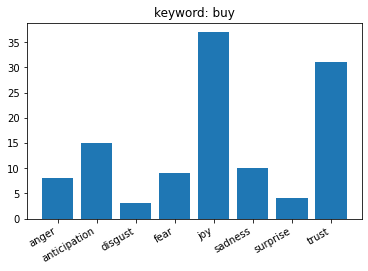

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: buy')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [bought, wrong, ticket, accident, meant, buy, ...
1     [hello, dad, co, owner, house, mom, divorced, ...
2     [latest, gem, classic, tune, included, broad, ...
3     [hey, everyone, girlfriend, one, first, people...
4     [help, thinking, rise, cassette, driven, mostl...
                            ...                        
56    [last, year, tech, house, become, super, popul...
57    [come, do, try, stay, well, clear, politics, p...
58    [theoretically, could, album, similar, may, li...
59    [recently, listening, buying, lot, older, hous...
60    [something, interesting, moti, turn, vip, mix,...
Name: selftext, Length: 61, dtype: object


In [14]:
import itertools

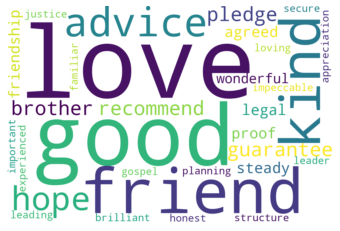

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 13),
 ('good', 9),
 ('friend', 5),
 ('kind', 4),
 ('advice', 3),
 ('hope', 3),
 ('guarantee', 2),
 ('recommend', 2),
 ('brother', 2),
 ('pledge', 2)]

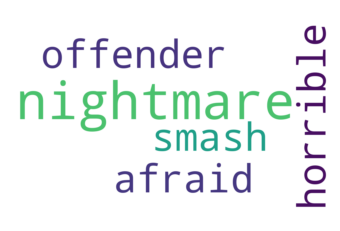

In [17]:
fear=emo(tokens,'fear')
wordcloud(fear)

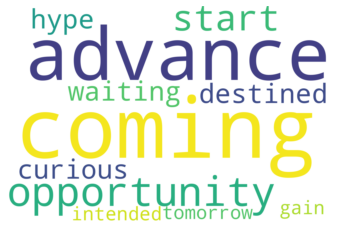

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('coming', 4),
 ('advance', 3),
 ('opportunity', 2),
 ('start', 2),
 ('waiting', 1),
 ('destined', 1),
 ('curious', 1),
 ('hype', 1),
 ('intended', 1),
 ('gain', 1)]

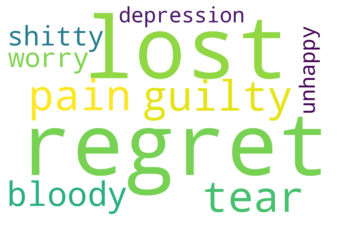

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

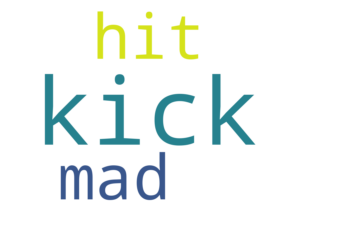

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

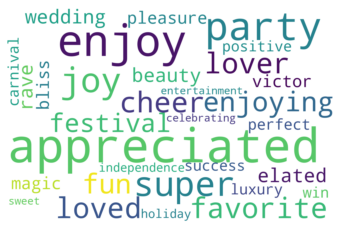

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)